In [4]:
#Basic python library which need to import
import pandas as pd
import numpy as np
import sys

#Date stuff
from datetime import datetime
from datetime import timedelta

#Library for Nice graphing
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as sn
%matplotlib inline

#Library for statistics operation
import scipy.stats as stats

# Date Time library
from datetime import datetime

#Machine learning Library
import statsmodels.api as sm
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Settings
pd.set_option('display.max_columns', None)
np.set_printoptions(threshold=sys.maxsize)
np.set_printoptions(precision=3)
sns.set(style="darkgrid")
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

In [7]:
#reading data into dataframe
credit= pd.read_csv("c:/Users/sai baba/downloads/Data for Associate DS.csv")

In [8]:
credit.head()

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000               NaN          0.000000      12  
4   678.334763        244.791237          0.000000      12

In [9]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [10]:
# Find the total number of missing values in the dataframe
print ("\nMissing values :  ", credit.isnull().sum().values.sum())

# printing total numbers of Unique value in the dataframe. 
print ("\nUnique values :  \n",credit.nunique())


Missing values :   314

Unique values :  
 CUST_ID                             8950
BALANCE                             8871
BALANCE_FREQUENCY                     43
PURCHASES                           6203
ONEOFF_PURCHASES                    4014
INSTALLMENTS_PURCHASES              4452
CASH_ADVANCE                        4323
PURCHASES_FREQUENCY                   47
ONEOFF_PURCHASES_FREQUENCY            47
PURCHASES_INSTALLMENTS_FREQUENCY      47
CASH_ADVANCE_FREQUENCY                54
CASH_ADVANCE_TRX                      65
PURCHASES_TRX                        173
CREDIT_LIMIT                         205
PAYMENTS                            8711
MINIMUM_PAYMENTS                    8636
PRC_FULL_PAYMENT                      47
TENURE                                 7
dtype: int64


In [11]:
credit.shape

(8950, 18)

In [12]:
# Intital descriptive analysis of data.
credit.describe()

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8950.000000        8950.000000   8950.000000       8950.000000   
mean    1564.474828           0.877271   1003.204834        592.437371   
std     2081.531879           0.236904   2136.634782       1659.887917   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.281915           0.888889     39.635000          0.000000   
50%      873.385231           1.000000    361.280000         38.000000   
75%     2054.140036           1.000000   1110.130000        577.405000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean               411.067645    978.871112             0.490351   
std                904.338115   2097.163877             0.401371   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.083333   
50%                 89.000000      0.000000             0.500000   
75%                468.637500   1113.821139             0.916667   
max              22500.000000  47137.211760             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 8950.000000                       8950.000000   
mean                     0.202458                          0.364437   
std                      0.298336                          0.397448   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.083333                          0.166667   
75%                      0.300000                          0.750000   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             8950.000000       8950.000000    8950.000000   8949.000000   
mean                 0.135144          3.248827      14.709832   4494.449450   
std                  0.200121          6.824647      24.857649   3638.815725   
min                  0.000000          0.000000       0.000000     50.000000   
25%                  0.000000          0.000000       1.000000   1600.000000   
50%                  0.000000          0.000000       7.000000   3000.000000   
75%                  0.222222          4.000000      17.000000   6500.000000   
max                  1.500000        123.000000     358.000000  30000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  
count   8950.000000       8637.000000       8950.000000  8950.000000  
mean    1733.143852        864.206542          0.153715    11.517318  
std     2895.063757       2372.446607          0.292499     1.338331  
min        0.000000          0.019163          0.000000     6.000000  
25%      383.276166        169.123707          0.000000    12.000000  
50%      856.901546        312.343947          0.000000    12.000000  
75%     1901.134317        825.485459          0.142857    12.000000  
max    50721.483360      76406.207520          1.000000    12.000000

In [13]:
credit.isnull().any()

CUST_ID                             False
BALANCE                             False
BALANCE_FREQUENCY                   False
PURCHASES                           False
ONEOFF_PURCHASES                    False
INSTALLMENTS_PURCHASES              False
CASH_ADVANCE                        False
PURCHASES_FREQUENCY                 False
ONEOFF_PURCHASES_FREQUENCY          False
PURCHASES_INSTALLMENTS_FREQUENCY    False
CASH_ADVANCE_FREQUENCY              False
CASH_ADVANCE_TRX                    False
PURCHASES_TRX                       False
CREDIT_LIMIT                         True
PAYMENTS                            False
MINIMUM_PAYMENTS                     True
PRC_FULL_PAYMENT                    False
TENURE                              False
dtype: bool

In [14]:
# CREDIT_LIMIT  and MINIMUM_PAYMENTS has missing values so we need to remove with median.

credit['CREDIT_LIMIT'].fillna(credit['CREDIT_LIMIT'].median(),inplace=True)

credit['CREDIT_LIMIT'].count()


credit['MINIMUM_PAYMENTS'].median()
credit['MINIMUM_PAYMENTS'].fillna(credit['MINIMUM_PAYMENTS'].median(),inplace=True)

In [15]:
# Now again check the missing values.

credit.isnull().any()

CUST_ID                             False
BALANCE                             False
BALANCE_FREQUENCY                   False
PURCHASES                           False
ONEOFF_PURCHASES                    False
INSTALLMENTS_PURCHASES              False
CASH_ADVANCE                        False
PURCHASES_FREQUENCY                 False
ONEOFF_PURCHASES_FREQUENCY          False
PURCHASES_INSTALLMENTS_FREQUENCY    False
CASH_ADVANCE_FREQUENCY              False
CASH_ADVANCE_TRX                    False
PURCHASES_TRX                       False
CREDIT_LIMIT                        False
PAYMENTS                            False
MINIMUM_PAYMENTS                    False
PRC_FULL_PAYMENT                    False
TENURE                              False
dtype: bool

In [16]:
#Monthly avg purchases

In [17]:
credit['Monthly_avg_purchase']=credit['PURCHASES']/credit['TENURE']

In [18]:
print(credit['Monthly_avg_purchase'].head(),'\n ',
credit['TENURE'].head(),'\n', credit['PURCHASES'].head())

0      7.950000
1      0.000000
2     64.430833
3    124.916667
4      1.333333
Name: Monthly_avg_purchase, dtype: float64 
  0    12
1    12
2    12
3    12
4    12
Name: TENURE, dtype: int64 
 0      95.40
1       0.00
2     773.17
3    1499.00
4      16.00
Name: PURCHASES, dtype: float64


In [19]:
#monthly cash advance amount

In [20]:
credit['Monthly_cash_advance']=credit['CASH_ADVANCE']/credit['TENURE']

In [21]:
credit[credit['ONEOFF_PURCHASES']==0]['ONEOFF_PURCHASES'].count()

4302

In [22]:
#Purchases by type (one-off, installments)

In [23]:
credit.loc[:,['ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES']]

ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES
0                 0.00                   95.40
1                 0.00                    0.00
2               773.17                    0.00
3              1499.00                    0.00
4                16.00                    0.00
...                ...                     ...
8945              0.00                  291.12
8946              0.00                  300.00
8947              0.00                  144.40
8948              0.00                    0.00
8949           1093.25                    0.00

[8950 rows x 2 columns]

In [24]:
#Find customers ONEOFF_PURCHASES and INSTALLMENTS_PURCHASES details

In [25]:
credit[(credit['ONEOFF_PURCHASES']==0) & (credit['INSTALLMENTS_PURCHASES']==0)].shape

(2042, 20)

In [26]:
credit[(credit['ONEOFF_PURCHASES']>0) & (credit['INSTALLMENTS_PURCHASES']>0)].shape

(2774, 20)

In [27]:
credit[(credit['ONEOFF_PURCHASES']>0) & (credit['INSTALLMENTS_PURCHASES']==0)].shape

(1874, 20)

In [28]:
credit[(credit['ONEOFF_PURCHASES']==0) & (credit['INSTALLMENTS_PURCHASES']>0)].shape

(2260, 20)

In [29]:
#As per above detail we found out that there are 4 types of purchase behaviour in the data set. So we need to derive a categorical variable based on their behaviour

In [30]:
def purchase(credit):
    if (credit['ONEOFF_PURCHASES']==0) & (credit['INSTALLMENTS_PURCHASES']==0):
        return 'none'
    if (credit['ONEOFF_PURCHASES']>0) & (credit['INSTALLMENTS_PURCHASES']>0):
         return 'both_oneoff_installment'
    if (credit['ONEOFF_PURCHASES']>0) & (credit['INSTALLMENTS_PURCHASES']==0):
        return 'one_off'
    if (credit['ONEOFF_PURCHASES']==0) & (credit['INSTALLMENTS_PURCHASES']>0):
        return 'istallment'

In [32]:
credit['purchase_type']=credit.apply(purchase,axis=1)

In [33]:
credit['purchase_type'].value_counts()

both_oneoff_installment    2774
istallment                 2260
none                       2042
one_off                    1874
Name: purchase_type, dtype: int64

In [35]:
#Limit_usage (balance to credit limit ratio ) credit card utilization
#Lower value implies cutomers are maintaing thier balance properly. Lower value means good credit score

In [36]:
credit['limit_usage']=credit.apply(lambda x: x['BALANCE']/x['CREDIT_LIMIT'], axis=1)

In [37]:
credit['limit_usage'].head()

0    0.040901
1    0.457495
2    0.332687
3    0.222223
4    0.681429
Name: limit_usage, dtype: float64

In [38]:
#Payments to minimum payments ratio etc.¶

In [39]:
credit['PAYMENTS'].isnull().any()
credit['MINIMUM_PAYMENTS'].isnull().value_counts()

False    8950
Name: MINIMUM_PAYMENTS, dtype: int64

In [40]:
credit['MINIMUM_PAYMENTS'].describe()

count     8950.000000
mean       844.906767
std       2332.792322
min          0.019163
25%        170.857654
50%        312.343947
75%        788.713501
max      76406.207520
Name: MINIMUM_PAYMENTS, dtype: float64

In [41]:
credit['payment_minpay']=credit.apply(lambda x:x['PAYMENTS']/x['MINIMUM_PAYMENTS'],axis=1)

In [42]:
credit['payment_minpay']

0       1.446508
1       3.826241
2       0.991682
3       0.000000
4       2.771075
          ...   
8945    6.660231
8946    0.883197
8947    0.986076
8948    0.942505
8949    0.715439
Name: payment_minpay, Length: 8950, dtype: float64

In [43]:
#Extreme value Treatment
#Since there are variables having extreme values so I am doing log-transformation on the dataset to remove outlier effect

In [44]:
# log tranformation
cr_log=credit.drop(['CUST_ID','purchase_type'],axis=1).applymap(lambda x: np.log(x+1))

In [45]:
cr_log.describe()

BALANCE  BALANCE_FREQUENCY    PURCHASES  ONEOFF_PURCHASES  \
count  8950.000000        8950.000000  8950.000000       8950.000000   
mean      6.161637           0.619940     4.899647          3.204274   
std       2.013303           0.148590     2.916872          3.246365   
min       0.000000           0.000000     0.000000          0.000000   
25%       4.861995           0.635989     3.704627          0.000000   
50%       6.773521           0.693147     5.892417          3.663562   
75%       7.628099           0.693147     7.013133          6.360274   
max       9.854515           0.693147    10.800403         10.615512   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean                 3.352403      3.319086             0.361268   
std                  3.082973      3.566298             0.277317   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.080042   
50%                  4.499810      0.000000             0.405465   
75%                  6.151961      7.016449             0.650588   
max                 10.021315     10.760839             0.693147   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 8950.000000                       8950.000000   
mean                     0.158699                          0.270072   
std                      0.216672                          0.281852   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.080042                          0.154151   
75%                      0.262364                          0.559616   
max                      0.693147                          0.693147   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             8950.000000       8950.000000    8950.000000   8950.000000   
mean                 0.113512          0.817570       1.894731      8.094825   
std                  0.156716          1.009316       1.373856      0.819629   
min                  0.000000          0.000000       0.000000      3.931826   
25%                  0.000000          0.000000       0.693147      7.378384   
50%                  0.000000          0.000000       2.079442      8.006701   
75%                  0.200671          1.609438       2.890372      8.779711   
max                  0.916291          4.820282       5.883322     10.308986   

          PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  \
count  8950.000000       8950.000000       8950.000000  8950.000000   
mean      6.624540          5.916079          0.117730     2.519680   
std       1.591763          1.169929          0.211617     0.130367   
min       0.000000          0.018982          0.000000     1.945910   
25%       5.951361          5.146667          0.000000     2.564949   
50%       6.754489          5.747301          0.000000     2.564949   
75%       7.550732          6.671670          0.133531     2.564949   
max      10.834125         11.243832          0.693147     2.564949   

       Monthly_avg_purchase  Monthly_cash_advance  limit_usage  payment_minpay  
count           8950.000000           8950.000000  8950.000000     8950.000000  
mean               3.050877              2.163970     0.296081        1.357600  
std                2.002823              2.429741     0.250303        0.940149  
min                0.000000              0.000000     0.000000        0.000000  
25%                1.481458              0.000000     0.040656        0.648817  
50%                3.494587              0.000000     0.264455        1.109459  
75%                4.587295              4.606022     0.540911        1.953415  
max                8.315721              8.276166     2.827902        8.830767

In [46]:
col=['BALANCE','PURCHASES','CASH_ADVANCE','TENURE','PAYMENTS','MINIMUM_PAYMENTS','PRC_FULL_PAYMENT','CREDIT_LIMIT']
cr_pre=cr_log[[x for x in cr_log.columns if x not in col ]]

In [47]:
cr_pre.columns

Index(['BALANCE_FREQUENCY', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'Monthly_avg_purchase',
       'Monthly_cash_advance', 'limit_usage', 'payment_minpay'],
      dtype='object')

In [48]:
cr_log.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE', 'Monthly_avg_purchase', 'Monthly_cash_advance', 'limit_usage',
       'payment_minpay'],
      dtype='object')

In [49]:
#Insights from KPIs

In [50]:
#Average payment_minpayment ratio for each purchse type.

In [51]:
x=credit.groupby('purchase_type').apply(lambda x: np.mean(x['payment_minpay']))
type(x)
x.values

array([ 7.237, 13.259, 10.087,  5.571])

In [61]:
ax.barh?

Text(0.5, 1.0, 'Mean payment_minpayment ratio for each purchse type')

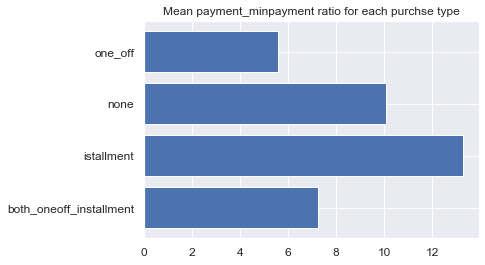

In [53]:
fig,ax=plt.subplots()
ax.barh(y=range(len(x)), width=x.values,align='center')
ax.set(yticks= np.arange(len(x)),yticklabels = x.index);
plt.title('Mean payment_minpayment ratio for each purchse type')

In [54]:
credit.describe()

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8950.000000        8950.000000   8950.000000       8950.000000   
mean    1564.474828           0.877271   1003.204834        592.437371   
std     2081.531879           0.236904   2136.634782       1659.887917   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.281915           0.888889     39.635000          0.000000   
50%      873.385231           1.000000    361.280000         38.000000   
75%     2054.140036           1.000000   1110.130000        577.405000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean               411.067645    978.871112             0.490351   
std                904.338115   2097.163877             0.401371   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.083333   
50%                 89.000000      0.000000             0.500000   
75%                468.637500   1113.821139             0.916667   
max              22500.000000  47137.211760             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 8950.000000                       8950.000000   
mean                     0.202458                          0.364437   
std                      0.298336                          0.397448   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.083333                          0.166667   
75%                      0.300000                          0.750000   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             8950.000000       8950.000000    8950.000000   8950.000000   
mean                 0.135144          3.248827      14.709832   4494.282473   
std                  0.200121          6.824647      24.857649   3638.646702   
min                  0.000000          0.000000       0.000000     50.000000   
25%                  0.000000          0.000000       1.000000   1600.000000   
50%                  0.000000          0.000000       7.000000   3000.000000   
75%                  0.222222          4.000000      17.000000   6500.000000   
max                  1.500000        123.000000     358.000000  30000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  \
count   8950.000000       8950.000000       8950.000000  8950.000000   
mean    1733.143852        844.906767          0.153715    11.517318   
std     2895.063757       2332.792322          0.292499     1.338331   
min        0.000000          0.019163          0.000000     6.000000   
25%      383.276166        170.857654          0.000000    12.000000   
50%      856.901546        312.343947          0.000000    12.000000   
75%     1901.134317        788.713501          0.142857    12.000000   
max    50721.483360      76406.207520          1.000000    12.000000   

       Monthly_avg_purchase  Monthly_cash_advance  limit_usage  payment_minpay  
count           8950.000000           8950.000000  8950.000000     8950.000000  
mean              86.175173             88.977984     0.388884        9.059164  
std              180.508787            193.136115     0.389722      118.180526  
min                0.000000              0.000000     0.000000        0.000000  
25%                3.399375              0.000000     0.041494        0.913275  
50%               31.936667              0.000000     0.302720        2.032717  
75%               97.228333             99.085196     0.717571        6.052729  
max             4086.630833           3928.100980    15.909951     6840.52

In [55]:
#customers with installment purchases are paying dues

In [56]:
credit[credit['purchase_type']=='n']

Empty DataFrame
Columns: [CUST_ID, BALANCE, BALANCE_FREQUENCY, PURCHASES, ONEOFF_PURCHASES, INSTALLMENTS_PURCHASES, CASH_ADVANCE, PURCHASES_FREQUENCY, ONEOFF_PURCHASES_FREQUENCY, PURCHASES_INSTALLMENTS_FREQUENCY, CASH_ADVANCE_FREQUENCY, CASH_ADVANCE_TRX, PURCHASES_TRX, CREDIT_LIMIT, PAYMENTS, MINIMUM_PAYMENTS, PRC_FULL_PAYMENT, TENURE, Monthly_avg_purchase, Monthly_cash_advance, purchase_type, limit_usage, payment_minpay]
Index: []

Text(0.5, 1.0, 'Average cash advance taken by customers of different Purchase type : Both, None,Installment,One_Off')

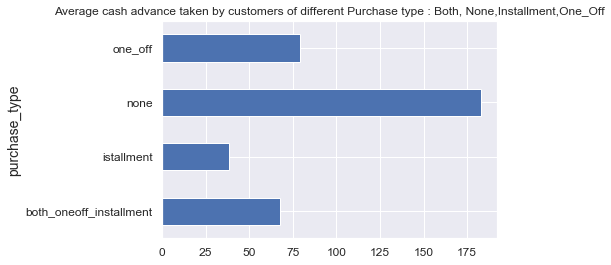

In [65]:
credit.groupby('purchase_type').apply(lambda x: np.mean(x['Monthly_cash_advance'])).plot.barh()

plt.title('Average cash advance taken by customers of different Purchase type : Both, None,Installment,One_Off')

In [66]:
#Customers who don't do either one-off or installment purchases take more cash on advance

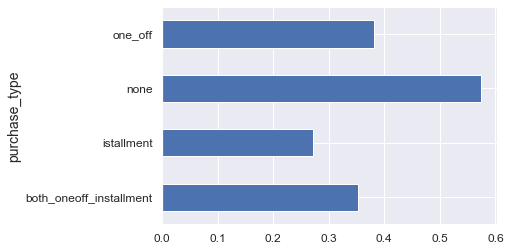

In [63]:
credit.groupby('purchase_type').apply(lambda x: np.mean(x['limit_usage'])).plot.barh()

In [64]:
#Original dataset with categorical column converted to number type.

In [67]:
cre_original=pd.concat([credit,pd.get_dummies(credit['purchase_type'])],axis=1)

In [68]:
#Preparing Machine learning algorithm
#We do have some categorical data which need to convert with the help of dummy creation

In [69]:
# creating Dummies for categorical variable
cr_pre['purchase_type']=credit.loc[:,'purchase_type']
pd.get_dummies(cr_pre['purchase_type'])

both_oneoff_installment  istallment  none  one_off
0                           0           1     0        0
1                           0           0     1        0
2                           0           0     0        1
3                           0           0     0        1
4                           0           0     0        1
...                       ...         ...   ...      ...
8945                        0           1     0        0
8946                        0           1     0        0
8947                        0           1     0        0
8948                        0           0     1        0
8949                        0           0     0        1

[8950 rows x 4 columns]

In [70]:
#Now merge the created dummy with the original data frame

In [71]:
cr_dummy=pd.concat([cr_pre,pd.get_dummies(cr_pre['purchase_type'])],axis=1)

In [72]:
l=['purchase_type']

In [73]:
cr_dummy=cr_dummy.drop(l,axis=1)
cr_dummy.isnull().any()

BALANCE_FREQUENCY                   False
ONEOFF_PURCHASES                    False
INSTALLMENTS_PURCHASES              False
PURCHASES_FREQUENCY                 False
ONEOFF_PURCHASES_FREQUENCY          False
PURCHASES_INSTALLMENTS_FREQUENCY    False
CASH_ADVANCE_FREQUENCY              False
CASH_ADVANCE_TRX                    False
PURCHASES_TRX                       False
Monthly_avg_purchase                False
Monthly_cash_advance                False
limit_usage                         False
payment_minpay                      False
both_oneoff_installment             False
istallment                          False
none                                False
one_off                             False
dtype: bool

In [74]:
cr_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE_FREQUENCY                 8950 non-null   float64
 1   ONEOFF_PURCHASES                  8950 non-null   float64
 2   INSTALLMENTS_PURCHASES            8950 non-null   float64
 3   PURCHASES_FREQUENCY               8950 non-null   float64
 4   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 5   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 6   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 7   CASH_ADVANCE_TRX                  8950 non-null   float64
 8   PURCHASES_TRX                     8950 non-null   float64
 9   Monthly_avg_purchase              8950 non-null   float64
 10  Monthly_cash_advance              8950 non-null   float64
 11  limit_usage                       8950 non-null   float64
 12  paymen

In [76]:
cr_dummy.head(3)

BALANCE_FREQUENCY  ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES  \
0           0.597837          0.000000                4.568506   
1           0.646627          0.000000                0.000000   
2           0.693147          6.651791                0.000000   

   PURCHASES_FREQUENCY  ONEOFF_PURCHASES_FREQUENCY  \
0             0.154151                    0.000000   
1             0.000000                    0.000000   
2             0.693147                    0.693147   

   PURCHASES_INSTALLMENTS_FREQUENCY  CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  \
0                          0.080042                0.000000          0.000000   
1                          0.000000                0.223144          1.609438   
2                          0.000000                0.000000          0.000000   

   PURCHASES_TRX  Monthly_avg_purchase  Monthly_cash_advance  limit_usage  \
0       1.098612              2.191654              0.000000     0.040086   
1       0.000000              0.000000              6.287695     0.376719   
2       2.564949              4.180994              0.000000     0.287197   

   payment_minpay  both_oneoff_installment  istallment  none  one_off  
0        0.894662                        0           1     0        0  
1        1.574068                        0           0     1        0  
2        0.688979                        0           0     0        1

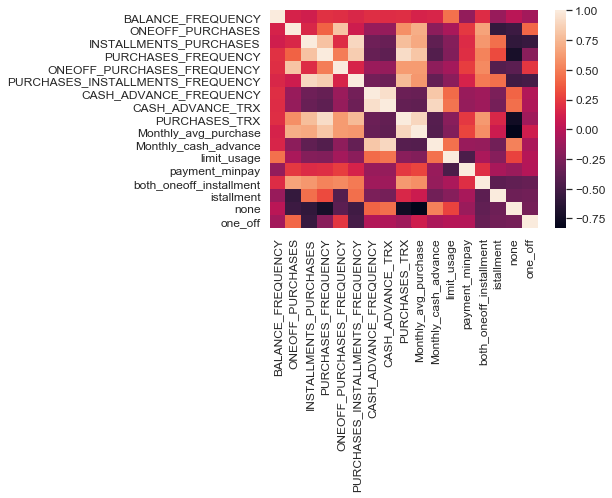

In [77]:
sns.heatmap(cr_dummy.corr())

In [78]:
#Heat map shows that many features are co-related so applying dimensionality reduction will help negating multi-colinearity in data
#Before applying PCA we will standardize data to avoid effect of scale on our result. Centering and Scaling will make all features with equal weight.

In [79]:
#Standardrizing data
#To put data on the same scale

In [80]:
from sklearn.preprocessing import  StandardScaler

In [81]:
sc=StandardScaler()

In [82]:
cr_dummy.shape

(8950, 17)

In [83]:
cr_scaled=sc.fit_transform(cr_dummy)

In [86]:
cr_scaled

array([[-1.488e-01, -9.871e-01,  3.945e-01, -7.469e-01, -7.325e-01,
        -6.743e-01, -7.244e-01, -8.101e-01, -5.795e-01, -4.290e-01,
        -8.907e-01, -1.023e+00, -4.924e-01, -6.702e-01,  1.721e+00,
        -5.437e-01, -5.146e-01],
       [ 1.796e-01, -9.871e-01, -1.087e+00, -1.303e+00, -7.325e-01,
        -9.583e-01,  6.996e-01,  7.846e-01, -1.379e+00, -1.523e+00,
         1.697e+00,  3.222e-01,  2.303e-01, -6.702e-01, -5.812e-01,
         1.839e+00, -5.146e-01],
       [ 4.927e-01,  1.062e+00, -1.087e+00,  1.197e+00,  2.467e+00,
        -9.583e-01, -7.244e-01, -8.101e-01,  4.879e-01,  5.643e-01,
        -8.907e-01, -3.550e-02, -7.112e-01, -6.702e-01, -5.812e-01,
        -5.437e-01,  1.943e+00],
       [-8.579e-01,  1.266e+00, -1.087e+00, -1.014e+00, -3.630e-01,
        -9.583e-01, -2.136e-01, -1.233e-01, -8.747e-01,  8.912e-01,
         3.024e-01, -3.812e-01, -1.444e+00, -6.702e-01, -5.812e-01,
        -5.437e-01,  1.943e+00],
       [ 4.927e-01, -1.143e-01, -1.087e+00, -1.014e+

In [87]:
#Applying PCA
#With the help of principal component analysis we will reduce features

In [88]:
from sklearn.decomposition import PCA

In [89]:
cr_dummy.shape

(8950, 17)

In [90]:
#We have 17 features so our n_component will be 17.
pc=PCA(n_components=17)
cr_pca=pc.fit(cr_scaled)

In [91]:
#Lets check if we will take 17 component then how much varience it explain. Ideally it should be 1 i.e 100%
sum(cr_pca.explained_variance_ratio_)

0.9999999999999999

In [92]:
var_ratio={}
for n in range(2,18):
    pc=PCA(n_components=n)
    cr_pca=pc.fit(cr_scaled)
    var_ratio[n]=sum(cr_pca.explained_variance_ratio_)

In [93]:
var_ratio

{2: 0.5826439793960282,
 3: 0.7299379309512699,
 4: 0.8115442762351271,
 5: 0.877055579529143,
 6: 0.9186492443512626,
 7: 0.9410925256030126,
 8: 0.9616114053683057,
 9: 0.9739787081990655,
 10: 0.9835896584630704,
 11: 0.9897248107341953,
 12: 0.9927550009135226,
 13: 0.995390756238543,
 14: 0.9979616898169593,
 15: 0.9996360473172954,
 16: 0.9999999999999999,
 17: 0.9999999999999999}

In [94]:
#Since 6 components are explaining about 90% variance so we select 5 components

In [95]:
pc=PCA(n_components=6)

In [96]:
p=pc.fit(cr_scaled)

In [97]:
cr_scaled.shape

(8950, 17)

In [98]:
p.explained_variance_

array([6.836, 3.07 , 2.504, 1.387, 1.114, 0.707])

In [99]:
np.sum(p.explained_variance_)

15.618782269308813

In [100]:
np.sum(p.explained_variance_)

15.618782269308813

In [101]:
var_ratio

{2: 0.5826439793960282,
 3: 0.7299379309512699,
 4: 0.8115442762351271,
 5: 0.877055579529143,
 6: 0.9186492443512626,
 7: 0.9410925256030126,
 8: 0.9616114053683057,
 9: 0.9739787081990655,
 10: 0.9835896584630704,
 11: 0.9897248107341953,
 12: 0.9927550009135226,
 13: 0.995390756238543,
 14: 0.9979616898169593,
 15: 0.9996360473172954,
 16: 0.9999999999999999,
 17: 0.9999999999999999}

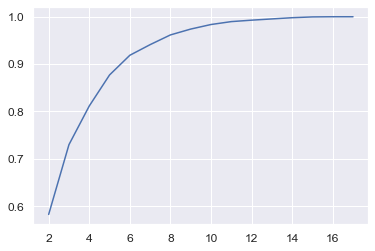

In [102]:
pd.Series(var_ratio).plot()

In [103]:
#Since 5 components are explaining about 87% variance so we select 5 components

In [104]:
cr_scaled.shape

(8950, 17)

In [105]:
pc_final=PCA(n_components=6).fit(cr_scaled)

reduced_cr=pc_final.fit_transform(cr_scaled)

In [106]:
dd=pd.DataFrame(reduced_cr)

In [107]:
dd.head()


0         1         2         3         4         5
0 -0.242841 -2.759668  0.343061 -0.417359 -0.007100  0.019755
1 -3.975652  0.144625 -0.542989  1.023832 -0.428929 -0.572463
2  1.287396  1.508938  2.709966 -1.892252  0.010809 -0.599932
3 -1.047613  0.673103  2.501794 -1.306784  0.761348  1.408986
4 -1.451586 -0.176336  2.286074 -1.624896 -0.561969 -0.675214

In [108]:
#So initially we had 17 variables now its 5 so our variable go reduced

In [109]:
dd.shape

(8950, 6)

In [110]:
col_list=cr_dummy.columns

In [111]:
col_list

Index(['BALANCE_FREQUENCY', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'Monthly_avg_purchase',
       'Monthly_cash_advance', 'limit_usage', 'payment_minpay',
       'both_oneoff_installment', 'istallment', 'none', 'one_off'],
      dtype='object')

In [112]:
pd.DataFrame(pc_final.components_.T, columns=['PC_' +str(i) for i in range(6)],index=col_list)


PC_0      PC_1      PC_2      PC_3  \
BALANCE_FREQUENCY                 0.029707  0.240072 -0.263140 -0.353549   
ONEOFF_PURCHASES                  0.214107  0.406078  0.239165  0.001520   
INSTALLMENTS_PURCHASES            0.312051 -0.098404 -0.315625  0.087983   
PURCHASES_FREQUENCY               0.345823  0.015813 -0.162843 -0.074617   
ONEOFF_PURCHASES_FREQUENCY        0.214702  0.362208  0.163222  0.036303   
PURCHASES_INSTALLMENTS_FREQUENCY  0.295451 -0.112002 -0.330029  0.023502   
CASH_ADVANCE_FREQUENCY           -0.214336  0.286074 -0.278586  0.096353   
CASH_ADVANCE_TRX                 -0.229393  0.291556 -0.285089  0.103484   
PURCHASES_TRX                     0.355503  0.106625 -0.102743 -0.054296   
Monthly_avg_purchase              0.345992  0.141635  0.023986 -0.079373   
Monthly_cash_advance             -0.243861  0.264318 -0.257427  0.135292   
limit_usage                      -0.146302  0.235710 -0.251278 -0.431682   
payment_minpay                    0.119632  0.021328  0.136357  0.591561   
both_oneoff_installment           0.241392  0.273676 -0.131935  0.254710   
istallment                        0.082209 -0.443375 -0.208683 -0.190829   
none                             -0.310283 -0.005214 -0.096911  0.245104   
one_off                          -0.042138  0.167737  0.472749 -0.338549   

                                      PC_4      PC_5  
BALANCE_FREQUENCY                -0.228681 -0.693816  
ONEOFF_PURCHASES                 -0.023197  0.129094  
INSTALLMENTS_PURCHASES           -0.002181  0.115223  
PURCHASES_FREQUENCY               0.115948 -0.081879  
ONEOFF_PURCHASES_FREQUENCY       -0.051279 -0.097299  
PURCHASES_INSTALLMENTS_FREQUENCY  0.025871  0.006731  
CASH_ADVANCE_FREQUENCY            0.360132  0.066589  
CASH_ADVANCE_TRX                  0.332753  0.082307  
PURCHASES_TRX                     0.104971 -0.009402  
Monthly_avg_purchase              0.194147  0.015878  
Monthly_cash_advance              0.268026  0.058258  
limit_usage                      -0.181885  0.024298  
payment_minpay                    0.215446 -0.572467  
both_oneoff_installment          -0.340849  0.294708  
istallment                        0.353821 -0.086087  
none                             -0.342222 -0.176809  
one_off                           0.362585 -0.060698

In [113]:
#So above data gave us eigen vector for each component we had all eigen vector value very small we can remove those variable bur in our case its not.¶

In [114]:
# Factor Analysis : variance explained by each component- 
pd.Series(pc_final.explained_variance_ratio_,index=['PC_'+ str(i) for i in range(6)])

PC_0    0.402058
PC_1    0.180586
PC_2    0.147294
PC_3    0.081606
PC_4    0.065511
PC_5    0.041594
dtype: float64

In [115]:
#Clustering
#Based on the intuition on type of purchases made by customers and their distinctive behavior exhibited based on the purchase_type (as visualized above in Insights from KPI) , I am starting with 4 clusters.

In [116]:
from sklearn.cluster import KMeans

In [117]:
km_4=KMeans(n_clusters=4,random_state=123)

In [118]:
km_4.fit(reduced_cr)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=123, tol=0.0001, verbose=0)

In [119]:
km_4.labels_

array([0, 1, 3, 3, 3, 0, 2, 0, 2, 3, 0, 3, 2, 2, 1, 0, 1, 0, 2, 0, 0, 2,
       0, 2, 1, 0, 3, 0, 2, 0, 2, 2, 3, 3, 0, 1, 1, 2, 3, 3, 1, 2, 3, 1,
       2, 2, 0, 1, 2, 3, 2, 2, 1, 3, 0, 3, 3, 2, 1, 0, 3, 3, 1, 3, 0, 2,
       1, 1, 2, 3, 0, 2, 1, 2, 2, 2, 3, 0, 1, 3, 2, 1, 2, 0, 2, 3, 2, 2,
       3, 1, 2, 2, 3, 3, 3, 1, 3, 1, 0, 1, 3, 0, 2, 0, 1, 3, 0, 1, 2, 2,
       2, 1, 2, 1, 2, 2, 0, 1, 0, 1, 2, 3, 0, 1, 1, 3, 1, 2, 3, 1, 3, 2,
       0, 3, 0, 2, 2, 2, 2, 3, 2, 1, 1, 2, 2, 3, 0, 3, 2, 2, 0, 2, 0, 2,
       2, 0, 2, 1, 2, 3, 1, 1, 2, 2, 0, 1, 0, 2, 0, 2, 1, 2, 0, 1, 2, 1,
       3, 1, 2, 0, 2, 0, 1, 3, 2, 0, 0, 2, 3, 3, 3, 3, 3, 0, 3, 2, 2, 2,
       3, 1, 3, 2, 0, 2, 2, 0, 3, 2, 2, 2, 2, 2, 1, 3, 0, 0, 2, 2, 2, 2,
       2, 2, 3, 2, 3, 3, 2, 2, 1, 2, 2, 0, 3, 3, 2, 3, 0, 2, 0, 2, 3, 2,
       2, 3, 2, 0, 2, 0, 0, 2, 3, 0, 0, 3, 1, 0, 3, 2, 0, 1, 3, 2, 2, 2,
       2, 2, 2, 3, 3, 2, 2, 3, 2, 2, 2, 3, 3, 3, 0, 2, 2, 0, 2, 2, 1, 1,
       1, 2, 3, 1, 2, 2, 3, 1, 0, 2, 3, 1, 3, 3, 3,

In [120]:
pd.Series(km_4.labels_).value_counts()

2    2769
0    2224
1    2088
3    1869
dtype: int64

In [121]:
#Here we donot have known k value so we will find the K. To do that we need to take a cluster range between 1 and 21.

#Identify cluster Error.

In [122]:
cluster_range = range( 1, 21 )
cluster_errors = []

for num_clusters in cluster_range:
    clusters = KMeans( num_clusters )
    clusters.fit( reduced_cr )
    cluster_errors.append( clusters.inertia_ )# clusters.inertia_ is basically cluster error here.

In [123]:
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )

clusters_df[0:21]

num_clusters  cluster_errors
0              1   139772.482528
1              2    93307.589087
2              3    70745.193400
3              4    49446.066485
4              5    42548.605568
5              6    37712.952211
6              7    34124.651234
7              8    31164.918750
8              9    28601.714658
9             10    26304.079741
10            11    24019.945762
11            12    22363.840350
12            13    21231.307021
13            14    20385.094756
14            15    18729.378170
15            16    18421.679424
16            17    17454.464200
17            18    16870.309939
18            19    16462.247201
19            20    15819.024917

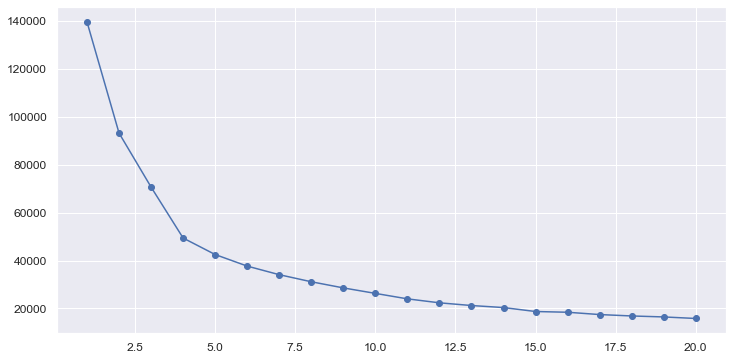

In [124]:
# allow plots to appear in the notebook
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

In [125]:
#From above graph we will find elbow range. here it is 4,5,6

#Silhouette Coefficient¶

In [126]:
from sklearn import metrics

In [127]:
# calculate SC for K=3 through K=12
k_range = range(2, 21)
scores = []
for k in k_range:
    km = KMeans(n_clusters=k, random_state=1)
    km.fit(reduced_cr)
    scores.append(metrics.silhouette_score(reduced_cr, km.labels_))

In [128]:
scores

[0.3312680667306928,
 0.35434954252843237,
 0.43708577439659474,
 0.43123723718523876,
 0.4228867639399418,
 0.3937963135186252,
 0.41809162539140143,
 0.38917300772433816,
 0.39313864497489576,
 0.36788045402270336,
 0.3670035207564237,
 0.3513315057884269,
 0.352614783540178,
 0.32954227834412875,
 0.3339471644625439,
 0.338189090378155,
 0.33542825363905737,
 0.3304092305070634,
 0.3215328121767455]

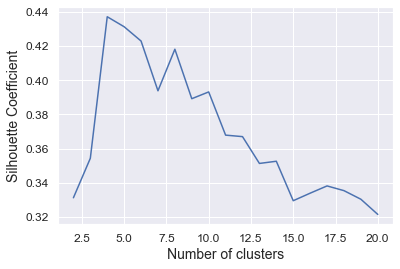

In [129]:
# plot the results
plt.plot(k_range, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)

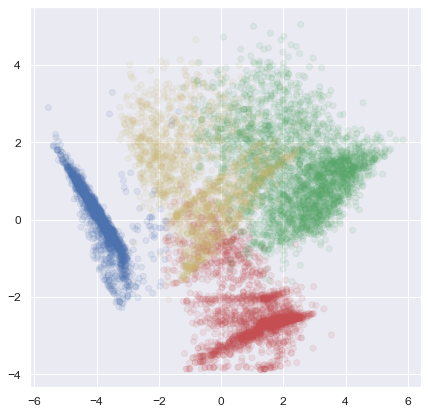

In [130]:
color_map={0:'r',1:'b',2:'g',3:'y'}
label_color=[color_map[l] for l in km_4.labels_]
plt.figure(figsize=(7,7))
plt.scatter(reduced_cr[:,0],reduced_cr[:,1],c=label_color,cmap='Spectral',alpha=0.1)

In [131]:
#It is very difficult to draw iddividual plot for cluster, so we will use pair plot which will provide us all graph in one shot. To do that we need to take following steps

In [132]:
df_pair_plot=pd.DataFrame(reduced_cr,columns=['PC_' +str(i) for i in range(6)])

In [133]:
df_pair_plot['Cluster']=km_4.labels_ #Add cluster column in the data frame

In [134]:
df_pair_plot.head()

PC_0      PC_1      PC_2      PC_3      PC_4      PC_5  Cluster
0 -0.242841 -2.759668  0.343061 -0.417359 -0.007100  0.019755        0
1 -3.975652  0.144625 -0.542989  1.023832 -0.428929 -0.572463        1
2  1.287396  1.508938  2.709966 -1.892252  0.010809 -0.599932        3
3 -1.047613  0.673103  2.501794 -1.306784  0.761348  1.408986        3
4 -1.451586 -0.176336  2.286074 -1.624896 -0.561969 -0.675214        3

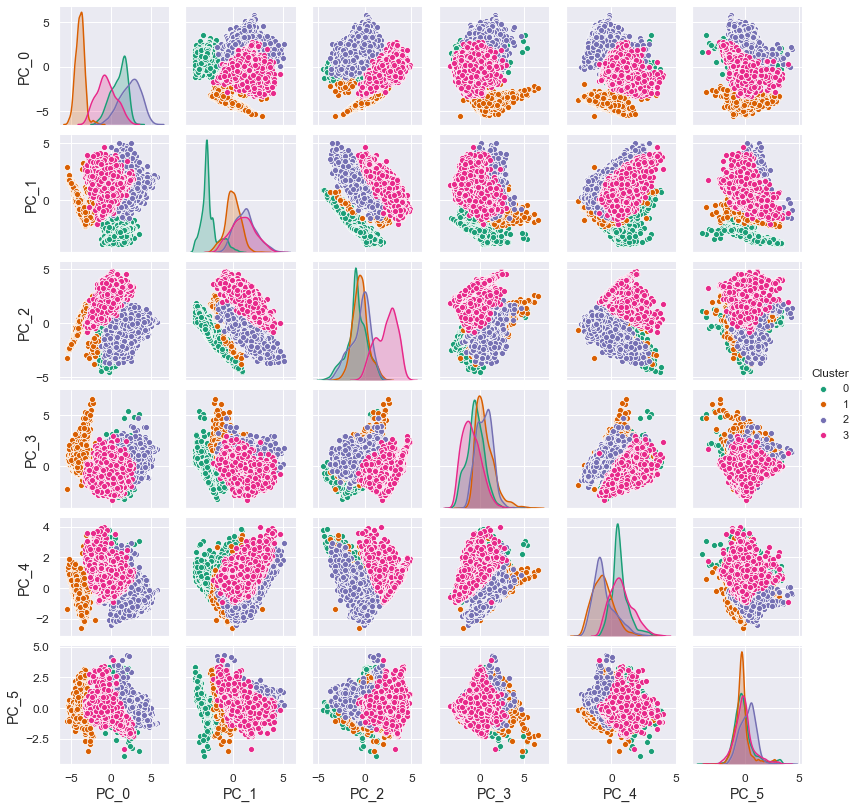

In [135]:
#pairwise relationship of components on the data
sns.pairplot(df_pair_plot,hue='Cluster', palette= 'Dark2', diag_kind='kde',size=1.85)

In [136]:
#It shows that first two components are able to indentify clusters

#Now we have done here with priciple component now we need to come bring our original data frame and we will merge the cluster with them.
#To interprate result we need to use our data frame

In [137]:
# Key performace variable selection . here i am taking varibales which we will use in derving new KPI. 
#We can take all 17 variables but it will be difficult to interprate.So are are selecting less no of variables.

col_kpi=['PURCHASES_TRX','Monthly_avg_purchase','Monthly_cash_advance','limit_usage','CASH_ADVANCE_TRX',
         'payment_minpay','both_oneoff_installment','istallment','one_off','none','CREDIT_LIMIT']

In [138]:
cr_pre.describe()

BALANCE_FREQUENCY  ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES  \
count        8950.000000       8950.000000             8950.000000   
mean            0.619940          3.204274                3.352403   
std             0.148590          3.246365                3.082973   
min             0.000000          0.000000                0.000000   
25%             0.635989          0.000000                0.000000   
50%             0.693147          3.663562                4.499810   
75%             0.693147          6.360274                6.151961   
max             0.693147         10.615512               10.021315   

       PURCHASES_FREQUENCY  ONEOFF_PURCHASES_FREQUENCY  \
count          8950.000000                 8950.000000   
mean              0.361268                    0.158699   
std               0.277317                    0.216672   
min               0.000000                    0.000000   
25%               0.080042                    0.000000   
50%               0.405465                    0.080042   
75%               0.650588                    0.262364   
max               0.693147                    0.693147   

       PURCHASES_INSTALLMENTS_FREQUENCY  CASH_ADVANCE_FREQUENCY  \
count                       8950.000000             8950.000000   
mean                           0.270072                0.113512   
std                            0.281852                0.156716   
min                            0.000000                0.000000   
25%                            0.000000                0.000000   
50%                            0.154151                0.000000   
75%                            0.559616                0.200671   
max                            0.693147                0.916291   

       CASH_ADVANCE_TRX  PURCHASES_TRX  Monthly_avg_purchase  \
count       8950.000000    8950.000000           8950.000000   
mean           0.817570       1.894731              3.050877   
std            1.009316       1.373856              2.002823   
min            0.000000       0.000000              0.000000   
25%            0.000000       0.693147              1.481458   
50%            0.000000       2.079442              3.494587   
75%            1.609438       2.890372              4.587295   
max            4.820282       5.883322              8.315721   

       Monthly_cash_advance  limit_usage  payment_minpay  
count           8950.000000  8950.000000     8950.000000  
mean               2.163970     0.296081        1.357600  
std                2.429741     0.250303        0.940149  
min                0.000000     0.000000        0.000000  
25%                0.000000     0.040656        0.648817  
50%                0.000000     0.264455        1.109459  
75%                4.606022     0.540911        1.953415  
max                8.276166     2.827902        8.830767

In [139]:
# Conactenating labels found through Kmeans with data 
cluster_df_4=pd.concat([cre_original[col_kpi],pd.Series(km_4.labels_,name='Cluster_4')],axis=1)

In [140]:
cluster_df_4.head()


PURCHASES_TRX  Monthly_avg_purchase  Monthly_cash_advance  limit_usage  \
0              2              7.950000              0.000000     0.040901   
1              0              0.000000            536.912124     0.457495   
2             12             64.430833              0.000000     0.332687   
3              1            124.916667             17.149001     0.222223   
4              1              1.333333              0.000000     0.681429   

   CASH_ADVANCE_TRX  payment_minpay  both_oneoff_installment  istallment  \
0                 0        1.446508                        0           1   
1                 4        3.826241                        0           0   
2                 0        0.991682                        0           0   
3                 1        0.000000                        0           0   
4                 0        2.771075                        0           0   

   one_off  none  CREDIT_LIMIT  Cluster_4  
0        0     0        1000.0          0  
1        0     1        7000.0          1  
2        1     0        7500.0          3  
3        1     0        7500.0          3  
4        1     0        1200.0          3

In [141]:
# Mean value gives a good indication of the distribution of data. So we are finding mean value for each variable for each cluster
cluster_4=cluster_df_4.groupby('Cluster_4')\
.apply(lambda x: x[col_kpi].mean()).T
cluster_4


Cluster_4                          0            1            2            3
PURCHASES_TRX              12.062050     0.043582    33.013723     7.127341
Monthly_avg_purchase       47.626256     0.148297   193.008043    69.875917
Monthly_cash_advance       33.550080   186.281319    67.466910    78.098613
limit_usage                 0.264745     0.576076     0.353591     0.379761
CASH_ADVANCE_TRX            1.021133     6.540230     2.804261     2.881220
payment_minpay             13.422420     9.936617     7.245651     5.573672
both_oneoff_installment     0.000000     0.001916     1.000000     0.000535
istallment                  1.000000     0.017241     0.000000     0.000000
one_off                     0.000000     0.002874     0.000000     0.999465
none                        0.000000     0.977969     0.000000     0.000000
CREDIT_LIMIT             3338.270406  4055.156450  5736.732730  4519.708481

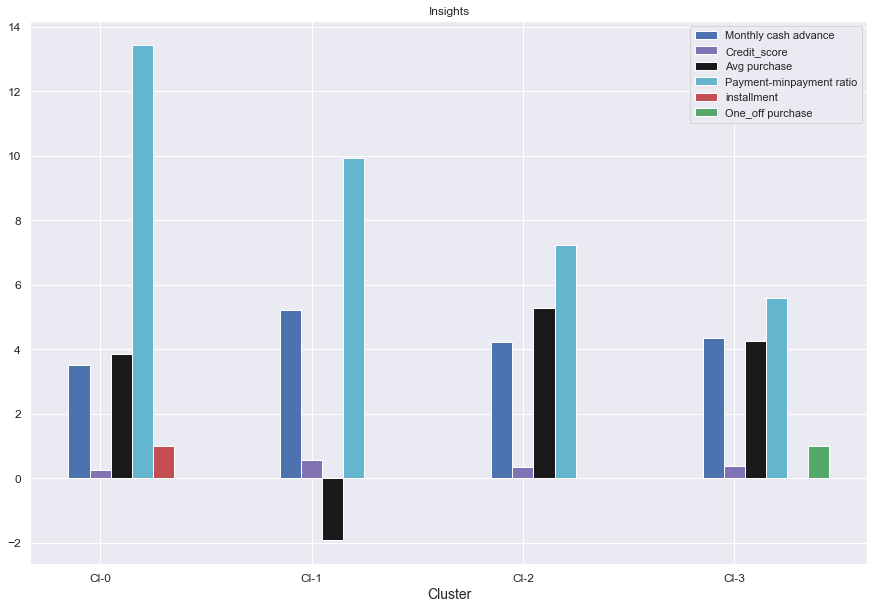

In [142]:
fig,ax=plt.subplots(figsize=(15,10))
index=np.arange(len(cluster_4.columns))

cash_advance=np.log(cluster_4.loc['Monthly_cash_advance',:].values)
credit_score=(cluster_4.loc['limit_usage',:].values)
purchase= np.log(cluster_4.loc['Monthly_avg_purchase',:].values)
payment=cluster_4.loc['payment_minpay',:].values
installment=cluster_4.loc['istallment',:].values
one_off=cluster_4.loc['one_off',:].values


bar_width=.10
b1=plt.bar(index,cash_advance,color='b',label='Monthly cash advance',width=bar_width)
b2=plt.bar(index+bar_width,credit_score,color='m',label='Credit_score',width=bar_width)
b3=plt.bar(index+2*bar_width,purchase,color='k',label='Avg purchase',width=bar_width)
b4=plt.bar(index+3*bar_width,payment,color='c',label='Payment-minpayment ratio',width=bar_width)
b5=plt.bar(index+4*bar_width,installment,color='r',label='installment',width=bar_width)
b6=plt.bar(index+5*bar_width,one_off,color='g',label='One_off purchase',width=bar_width)

plt.xlabel("Cluster")
plt.title("Insights")
plt.xticks(index + bar_width, ('Cl-0', 'Cl-1', 'Cl-2', 'Cl-3'))
plt.legend()

In [143]:
# Percentage of each cluster in the total customer base
s=cluster_df_4.groupby('Cluster_4').apply(lambda x: x['Cluster_4'].value_counts())
print (s),'\n'

per=pd.Series((s.values.astype('float')/ cluster_df_4.shape[0])*100,name='Percentage')
print ("Cluster -4 "),'\n'
print (pd.concat([pd.Series(s.values,name='Size'),per],axis=1))

Cluster_4   
0          0    2224
1          1    2088
2          2    2769
3          3    1869
Name: Cluster_4, dtype: int64
Cluster -4 
   Size  Percentage
0  2224   24.849162
1  2088   23.329609
2  2769   30.938547
3  1869   20.882682


In [144]:
km_5=KMeans(n_clusters=5,random_state=123)
km_5=km_5.fit(reduced_cr)
km_5.labels_

array([3, 0, 1, 1, 1, 3, 2, 3, 2, 1, 3, 1, 2, 2, 0, 3, 0, 3, 2, 3, 3, 4,
       3, 4, 0, 3, 1, 3, 4, 3, 4, 2, 1, 1, 3, 0, 0, 4, 1, 1, 0, 4, 1, 0,
       2, 4, 3, 0, 2, 1, 4, 2, 0, 1, 3, 1, 1, 2, 0, 3, 1, 1, 0, 1, 3, 2,
       0, 0, 2, 1, 3, 4, 0, 2, 2, 2, 1, 3, 0, 1, 2, 0, 2, 3, 2, 1, 4, 4,
       1, 0, 4, 4, 1, 1, 1, 0, 1, 0, 3, 0, 1, 3, 2, 3, 0, 1, 3, 0, 4, 4,
       2, 0, 4, 0, 2, 2, 3, 0, 3, 0, 4, 1, 3, 0, 0, 1, 0, 2, 1, 0, 1, 2,
       3, 1, 3, 2, 2, 4, 2, 1, 2, 0, 0, 2, 2, 1, 3, 1, 2, 2, 3, 2, 3, 4,
       2, 3, 4, 0, 2, 1, 0, 0, 2, 2, 3, 0, 3, 2, 3, 2, 0, 4, 3, 0, 4, 0,
       1, 0, 2, 3, 2, 3, 4, 1, 2, 3, 3, 2, 1, 1, 1, 1, 1, 3, 1, 2, 2, 2,
       1, 0, 1, 4, 3, 4, 2, 3, 1, 4, 4, 2, 4, 2, 0, 1, 3, 3, 4, 2, 4, 2,
       2, 2, 1, 2, 1, 1, 2, 2, 0, 2, 2, 3, 1, 1, 2, 1, 3, 2, 3, 2, 1, 2,
       2, 1, 2, 3, 2, 3, 4, 2, 1, 3, 3, 1, 0, 3, 1, 4, 3, 0, 1, 2, 2, 4,
       2, 2, 2, 1, 1, 2, 2, 1, 2, 2, 4, 1, 1, 1, 3, 2, 2, 3, 2, 2, 0, 0,
       0, 4, 1, 0, 2, 4, 1, 0, 3, 2, 1, 0, 1, 1, 1,

In [145]:
pd.Series(km_5.labels_).value_counts()

3    2149
0    2081
2    1977
1    1862
4     881
dtype: int64

Text(0, 0.5, 'PC_1')

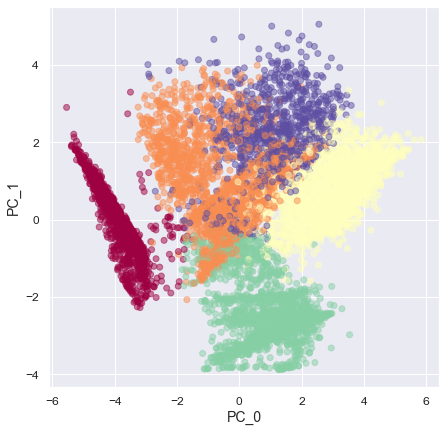

In [146]:
plt.figure(figsize=(7,7))
plt.scatter(reduced_cr[:,0],reduced_cr[:,1],c=km_5.labels_,cmap='Spectral',alpha=0.5)
plt.xlabel('PC_0')
plt.ylabel('PC_1')

In [147]:
cluster_df_5=pd.concat([cre_original[col_kpi],pd.Series(km_5.labels_,name='Cluster_5')],axis=1)

In [148]:
# Finding Mean of features for each cluster
cluster_df_5.groupby('Cluster_5')\
.apply(lambda x: x[col_kpi].mean()).T

Cluster_5                          0            1            2            3  \
PURCHASES_TRX               0.032196     7.096670    34.587759    11.905537   
Monthly_avg_purchase        0.086126    68.917645   210.536468    47.369817   
Monthly_cash_advance      185.038534    74.517541     4.040708    20.636870   
limit_usage                 0.576110     0.377959     0.258931     0.250011   
CASH_ADVANCE_TRX            6.448823     2.697637     0.152757     0.550489   
payment_minpay              9.963172     5.562287     8.675499    13.783426   
both_oneoff_installment     0.000000     0.002148     1.000000     0.000000   
istallment                  0.015858     0.000000     0.000000     1.000000   
one_off                     0.002883     0.997852     0.000000     0.000000   
none                        0.981259     0.000000     0.000000     0.000000   
CREDIT_LIMIT             4046.692295  4497.951209  5722.970627  3228.949923   

Cluster_5                          4  
PURCHASES_TRX              27.703746  
Monthly_avg_purchase      141.584086  
Monthly_cash_advance      249.942101  
limit_usage                 0.600096  
CASH_ADVANCE_TRX           10.384790  
payment_minpay              3.651686  
both_oneoff_installment     0.900114  
istallment                  0.088536  
one_off                     0.011351  
none                        0.000000  
CREDIT_LIMIT             5873.041998

In [149]:
s1=cluster_df_5.groupby('Cluster_5').apply(lambda x: x['Cluster_5'].value_counts())
print (s1)

Cluster_5   
0          0    2081
1          1    1862
2          2    1977
3          3    2149
4          4     881
Name: Cluster_5, dtype: int64


In [150]:
# percentage of each cluster

print ("Cluster-5"),'\n'
per_5=pd.Series((s1.values.astype('float')/ cluster_df_5.shape[0])*100,name='Percentage')
print (pd.concat([pd.Series(s1.values,name='Size'),per_5],axis=1))

Cluster-5
   Size  Percentage
0  2081   23.251397
1  1862   20.804469
2  1977   22.089385
3  2149   24.011173
4   881    9.843575


In [151]:
#Finding behavior with 6 clusters

In [152]:
km_6=KMeans(n_clusters=6).fit(reduced_cr)
km_6.labels_

array([2, 0, 3, 3, 3, 2, 1, 2, 1, 3, 2, 3, 1, 1, 0, 2, 0, 2, 1, 2, 2, 5,
       2, 5, 0, 2, 4, 2, 5, 2, 5, 1, 4, 3, 2, 0, 0, 5, 4, 4, 0, 5, 3, 0,
       1, 5, 2, 0, 1, 4, 5, 1, 0, 3, 2, 3, 4, 1, 0, 2, 3, 3, 0, 3, 2, 1,
       0, 0, 1, 3, 2, 5, 0, 1, 1, 1, 3, 2, 0, 4, 1, 0, 1, 2, 1, 3, 5, 5,
       4, 0, 5, 5, 4, 3, 3, 0, 3, 0, 2, 0, 3, 2, 1, 2, 0, 4, 2, 0, 5, 5,
       1, 0, 5, 0, 1, 1, 2, 0, 2, 0, 5, 3, 2, 0, 0, 3, 0, 1, 4, 0, 3, 1,
       2, 4, 2, 1, 1, 5, 1, 4, 1, 0, 0, 1, 1, 3, 2, 3, 1, 1, 2, 1, 2, 5,
       1, 2, 5, 0, 1, 4, 0, 0, 1, 1, 2, 0, 2, 1, 2, 1, 0, 5, 2, 0, 5, 0,
       4, 0, 1, 2, 1, 2, 5, 3, 1, 2, 2, 1, 4, 4, 3, 3, 3, 2, 3, 1, 1, 1,
       3, 0, 3, 5, 2, 5, 1, 2, 4, 5, 5, 1, 5, 1, 0, 3, 2, 2, 5, 1, 5, 1,
       1, 1, 3, 1, 3, 3, 1, 1, 0, 1, 1, 2, 3, 3, 1, 3, 2, 1, 2, 1, 4, 1,
       1, 3, 1, 2, 1, 2, 5, 1, 4, 2, 2, 3, 0, 2, 3, 5, 2, 0, 3, 1, 1, 5,
       1, 1, 1, 3, 3, 1, 1, 4, 1, 1, 5, 3, 4, 3, 2, 1, 1, 2, 1, 1, 0, 0,
       0, 5, 3, 0, 1, 5, 3, 0, 2, 1, 4, 0, 3, 3, 4,

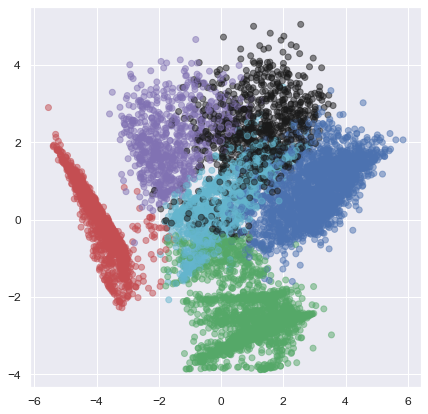

In [153]:
color_map={0:'r',1:'b',2:'g',3:'c',4:'m',5:'k'}
label_color=[color_map[l] for l in km_6.labels_]
plt.figure(figsize=(7,7))
plt.scatter(reduced_cr[:,0],reduced_cr[:,1],c=label_color,cmap='Spectral',alpha=0.5)

In [154]:
cluster_df_6 = pd.concat([cre_original[col_kpi],pd.Series(km_6.labels_,name='Cluster_6')],axis=1)

In [155]:
six_cluster=cluster_df_6.groupby('Cluster_6').apply(lambda x: x[col_kpi].mean()).T
six_cluster

Cluster_6                          0            1            2            3  \
PURCHASES_TRX               0.030347    34.663789    11.905537     7.760575   
Monthly_avg_purchase        0.088891   211.196582    47.369817    78.585295   
Monthly_cash_advance      184.829434     4.027720    20.636870     3.603272   
limit_usage                 0.575724     0.258206     0.250011     0.245772   
CASH_ADVANCE_TRX            6.434971     0.150838     0.550489     0.125212   
payment_minpay              9.976487     8.702974    13.783426     6.911822   
both_oneoff_installment     0.000000     1.000000     0.000000     0.006768   
istallment                  0.016378     0.000000     1.000000     0.000000   
one_off                     0.000000     0.000000     0.000000     0.993232   
none                        0.983622     0.000000     0.000000     0.000000   
CREDIT_LIMIT             4047.527296  5735.293514  3228.949923  4471.701020   

Cluster_6                          4            5  
PURCHASES_TRX               5.967143    27.919908  
Monthly_avg_purchase       54.091602   140.374727  
Monthly_cash_advance      205.502536   242.856971  
limit_usage                 0.605930     0.600654  
CASH_ADVANCE_TRX            7.642857    10.000000  
payment_minpay              3.257979     3.616973  
both_oneoff_installment     0.000000     0.911899  
istallment                  0.000000     0.088101  
one_off                     1.000000     0.000000  
none                        0.000000     0.000000  
CREDIT_LIMIT             4577.649351  5834.610984

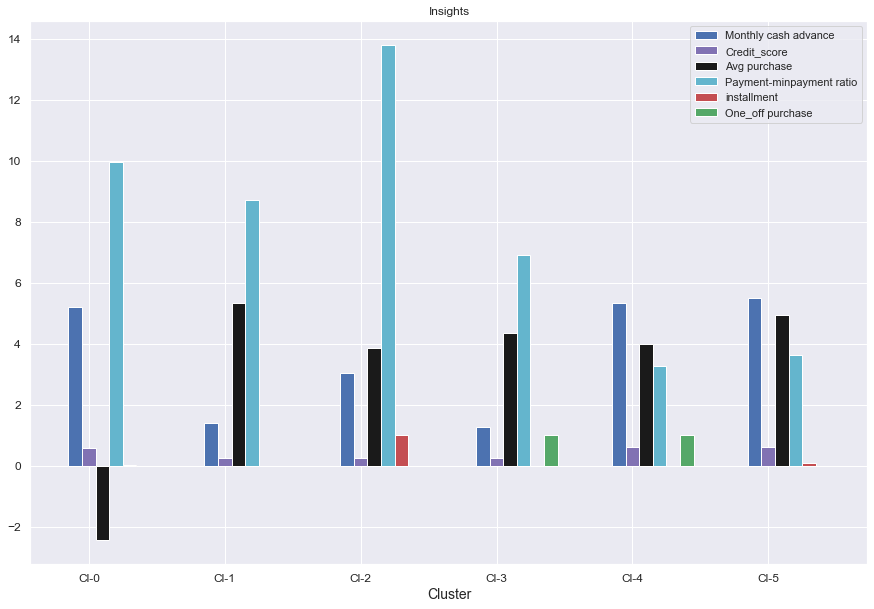

In [156]:
fig,ax=plt.subplots(figsize=(15,10))
index=np.arange(len(six_cluster.columns))

cash_advance=np.log(six_cluster.loc['Monthly_cash_advance',:].values)
credit_score=(six_cluster.loc['limit_usage',:].values)
purchase= np.log(six_cluster.loc['Monthly_avg_purchase',:].values)
payment=six_cluster.loc['payment_minpay',:].values
installment=six_cluster.loc['istallment',:].values
one_off=six_cluster.loc['one_off',:].values

bar_width=.10
b1=plt.bar(index,cash_advance,color='b',label='Monthly cash advance',width=bar_width)
b2=plt.bar(index+bar_width,credit_score,color='m',label='Credit_score',width=bar_width)
b3=plt.bar(index+2*bar_width,purchase,color='k',label='Avg purchase',width=bar_width)
b4=plt.bar(index+3*bar_width,payment,color='c',label='Payment-minpayment ratio',width=bar_width)
b5=plt.bar(index+4*bar_width,installment,color='r',label='installment',width=bar_width)
b6=plt.bar(index+5*bar_width,one_off,color='g',label='One_off purchase',width=bar_width)

plt.xlabel("Cluster")
plt.title("Insights")
plt.xticks(index + bar_width, ('Cl-0', 'Cl-1', 'Cl-2', 'Cl-3','Cl-4','Cl-5'))

plt.legend()

In [157]:
cash_advance=np.log(six_cluster.loc['Monthly_cash_advance',:].values)
credit_score=list(six_cluster.loc['limit_usage',:].values)
cash_advance

array([5.219, 1.393, 3.027, 1.282, 5.325, 5.492])

In [158]:
from sklearn.metrics import calinski_harabaz_score,silhouette_score

In [159]:
score={}
score_c={}
for n in range(3,10):
    km_score=KMeans(n_clusters=n)
    km_score.fit(reduced_cr)
    score_c[n]=calinski_harabaz_score(reduced_cr,km_score.labels_)
    score[n]=silhouette_score(reduced_cr,km_score.labels_)

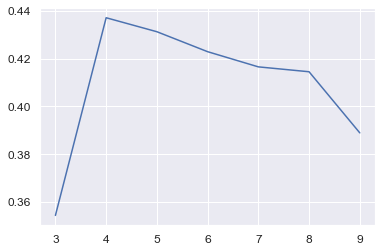

In [160]:
pd.Series(score).plot()

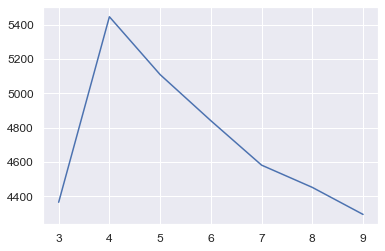

In [161]:
pd.Series(score_c).plot()

In [ ]:
#Performance metrics also suggest that K-means with 4 cluster is able to show distinguished characteristics of each cluster.